### Assessment for week 4: Combining internal and external measures

In this workbook we will explore some data from the UM Women's Field Hockey team.  We have data from several different dates in the data file -- but we'll focus on one particular date for this assessment. 



### Import Libraries and Dataset 

### Step 1

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import matplotlib.dates as mdates
import datetime
import plotly.graph_objects as go

import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("../Data/FH.csv", index_col =["Timestamp"], parse_dates=["Timestamp"])
df.shape

(5224154, 10)

### Step 2

In [2]:
Game_08_19_df = df.loc['2018-08-19']
Game_08_19_df.shape

(1781613, 10)

### Step 3:  Q1: Total number of rows in the dataset and total number of zeroes in the HR data

In [3]:
(Game_08_19_df == 0).sum(axis=0)  # we are just capturing the number of cells with a zero in them for each column in the dataframe_df == 0).sum(axis=0)  # we are just capturing the number of cells with a zero in them for each column in the dataframe

Unnamed: 0           0
Seconds             21
Velocity        877907
Acceleration      7333
Odometer          4346
Latitude             0
Longitude            0
Heart Rate      463914
Player Load       2911
AthleteID            0
dtype: int64

### Step 4: Start here

In [4]:
%%capture
Game_08_19_df.loc[Game_08_19_df['Heart Rate'] ==0,'Heart Rate'] = np.nan  # replace all Heart Rate values of zero with "nan"

### Step 4: Continues.  Q2 How many subjects had 100% of HR data missing?  How many had less than 10%?

In [5]:
%%capture
DataCount = Game_08_19_df.groupby('AthleteID')['Heart Rate','Player Load'].count()


DataCount['Missing HR values']= (DataCount['Player Load']-DataCount['Heart Rate'])
DataCount['% HR missing'] = DataCount['Missing HR values']/DataCount['Player Load']*100

In [6]:
print(DataCount)

            Heart Rate  Player Load  Missing HR values  % HR missing
AthleteID                                                           
Athlete 1        58139        74809              16670     22.283415
Athlete 10       86464        86497                 33      0.038152
Athlete 11       47363        84080              36717     43.669125
Athlete 12       86340        86347                  7      0.008107
Athlete 13       85287        85805                518      0.603694
Athlete 15       84766        84980                214      0.251824
Athlete 17       41628        85124              43496     51.097223
Athlete 18       76845        86385               9540     11.043584
Athlete 19       86065        86301                236      0.273461
Athlete 2         8241        85688              77447     90.382551
Athlete 20       81299        85378               4079      4.777577
Athlete 21       48032        85135              37103     43.581371
Athlete 22       49481        8412

### Finish of Step 4

In [7]:
Game_08_19_df=Game_08_19_df[Game_08_19_df['AthleteID'].isin(DataCount.query("`% HR missing` < 10").index)]
Game_08_19_df.shape

(854463, 10)

This is kind of interesting - in that the team warms up together - so they have a very similar profile during the first 1200 to 1800 seconds (20-30 minutes).  However, once the game starts, we see large differences -- based on whether they are playing in the game or not (presumably).  At least one player appears to have not had any play time. (Pink line)

### Step 5

In [8]:
Game_08_19_df['PLdelta'] = Game_08_19_df['Player Load'].diff().fillna(0)

Since it is not possible for an individual to have a negative player load change - we will remove any negative player load changes.  (Negative values can happen in the dataset when running the code above between players).

In [9]:
Game_08_19_df.loc[Game_08_19_df['PLdelta'] <0,'PLdelta'] = np.nan

### Step 6  Q3: How did the correlation between the (30, 60 and 90 sec) rolling player load change value and heart rate compare between this date - and the date use in the workbook?  Answer - considerably poorer this time around. -- we were 0.85+ in workbook -- but 0.75 for this data (8-19)

In [10]:
Game_08_19_df['PLd_rolling_30sec'] = Game_08_19_df['PLdelta'].rolling(300).sum()

Game_08_19_df['PLd_rolling_60sec'] = Game_08_19_df['PLdelta'].rolling(600).sum()

Game_08_19_df['PLd_rolling_90sec'] = Game_08_19_df['PLdelta'].rolling(900).sum()


Game_08_19_df.corr(method='pearson') # this will plot correlations for all columns -- we are interested in HR and these new columns

,Unnamed: 0,Seconds,Velocity,Acceleration,Odometer,Latitude,Longitude,Heart Rate,Player Load,PLdelta,PLd_rolling_30sec,PLd_rolling_60sec,PLd_rolling_90sec
Unnamed: 0,1.000000,0.015777,-0.004623,-0.000287,0.003791,0.020390,-0.087197,-0.055048,0.006136,-0.000051,-0.000082,-0.000190,-0.000456
Seconds,0.015777,1.000000,-0.009364,-0.000568,0.857687,0.033476,-0.011728,0.001798,0.882878,-0.011311,-0.036991,-0.041210,-0.044762
Velocity,-0.004623,-0.009364,1.000000,0.137047,0.086850,-0.010985,0.514456,0.521209,0.076898,0.420413,0.677419,0.637155,0.609472
Acceleration,-0.000287,-0.000568,0.137047,1.000000,-0.001708,-0.002507,0.001218,-0.015080,-0.001803,0.070592,-0.062629,-0.036997,-0.028615
Odometer,0.003791,0.857687,0.086850,-0.001708,1.000000,0.029656,0.094239,0.188131,0.991606,0.023749,0.078801,0.090109,0.097611
Latitude,0.020390,0.033476,-0.010985,-0.002507,0.029656,1.000000,0.298364,0.085743,0.035070,0.016297,0.040721,0.033087,0.017567
Longitude,-0.087197,-0.011728,0.514456,0.001218,0.094239,0.298364,1.000000,0.640690,0.082396,0.207534,0.625605,0.649042,0.656403
Heart Rate,-0.055048,0.001798,0.521209,-0.015080,0.188131,0.085743,0.640690,1.000000,0.170010,0.203019,0.686249,0.734770,0.742744
Player Load,0.006136,0.882878,0.076898,-0.001803,0.991606,0.035070,0.082396,0.170010,1.000000,0.022002,0.073446,0.084151,0.091226
PLdelta,-0.000051,-0.011311,0.420413,0.070592,0.023749,0.016297,0.207534,0.203019,0.022002,1.000000,0.280752,0.258215,0.244698


In [11]:
column_1 = Game_08_19_df['PLd_rolling_60sec']
column_2 = Game_08_19_df['Heart Rate']
correlation = column_1.corr(column_2)
print(correlation)

0.7347700991456434


Now let's get a look at the individual correlations between the 90 second rolling window player load change and the heart rate.  This figure allows us to see the relationship between these variable and also visualize the velocity that the athlete has based on the color.  (Alternatively, you can look at total player load or seconds to see how the end of the game compares to early in the game.)

### Step 7. Q4: Which graph is most peculiar?  A: Graph 20.  

AthleteID
Athlete 10    AxesSubplot(0.125,0.125;0.62x0.755)
Athlete 12    AxesSubplot(0.125,0.125;0.62x0.755)
Athlete 13    AxesSubplot(0.125,0.125;0.62x0.755)
Athlete 15    AxesSubplot(0.125,0.125;0.62x0.755)
Athlete 19    AxesSubplot(0.125,0.125;0.62x0.755)
Athlete 20    AxesSubplot(0.125,0.125;0.62x0.755)
Athlete 24    AxesSubplot(0.125,0.125;0.62x0.755)
Athlete 3     AxesSubplot(0.125,0.125;0.62x0.755)
Athlete 6     AxesSubplot(0.125,0.125;0.62x0.755)
Athlete 9     AxesSubplot(0.125,0.125;0.62x0.755)
dtype: object

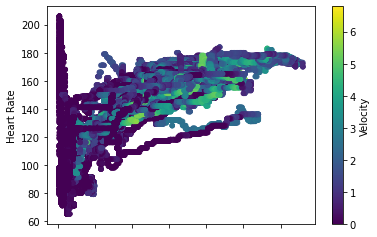

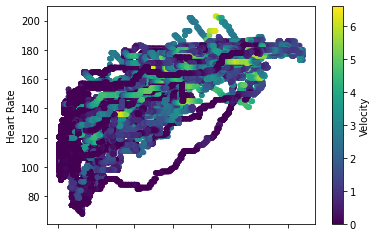

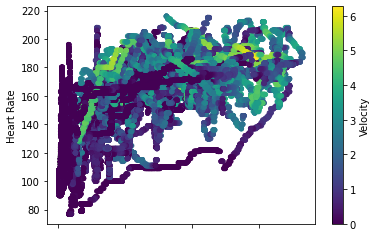

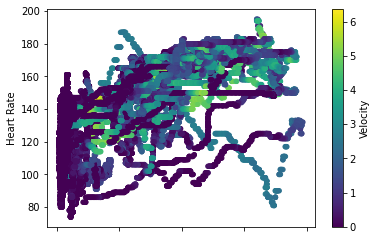

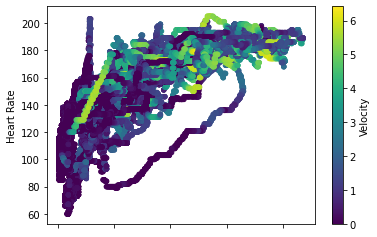

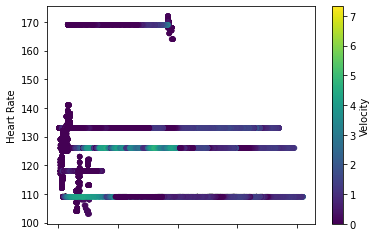

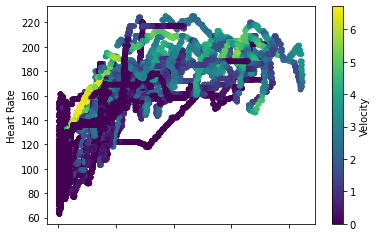

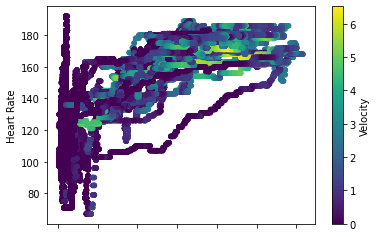

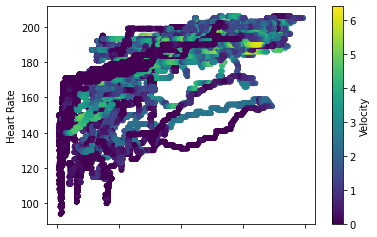

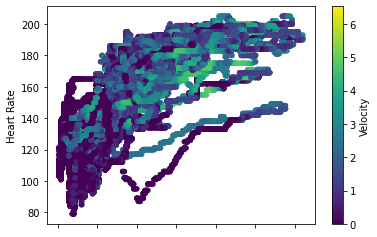

In [12]:
Game_08_19_df.groupby('AthleteID').plot.scatter(x='PLd_rolling_60sec', y='Heart Rate', c="Velocity", colormap='viridis')

### Step 8: Q5:  Using the slope and intercept that you have calculated and only the athletes that had good HR data for both the workbook and the assessment (9/30 and 8/19) -- determine which players would be predicted to have the highest capacity (playerload/min) at 150 and 180 beats per minute.  Answer: Athletes 15 and 19.

In [13]:
Game_08_19_df.dropna(inplace=True)

In [14]:
Game_08_19_df.isnull().values.any()

False

In [15]:
Ath13_Game_08_19_df=Game_08_19_df.loc[Game_08_19_df['AthleteID'] == 'Athlete 13']
Ath14_Game_08_19_df=Game_08_19_df.loc[Game_08_19_df['AthleteID'] == 'Athlete 14']
Ath15_Game_08_19_df=Game_08_19_df.loc[Game_08_19_df['AthleteID'] == 'Athlete 15']
Ath18_Game_08_19_df=Game_08_19_df.loc[Game_08_19_df['AthleteID'] == 'Athlete 18']
Ath19_Game_08_19_df=Game_08_19_df.loc[Game_08_19_df['AthleteID'] == 'Athlete 19']
Ath24_Game_08_19_df=Game_08_19_df.loc[Game_08_19_df['AthleteID'] == 'Athlete 24']
Ath3_Game_08_19_df=Game_08_19_df.loc[Game_08_19_df['AthleteID'] == 'Athlete 3']
Ath6_Game_08_19_df=Game_08_19_df.loc[Game_08_19_df['AthleteID'] == 'Athlete 6']

Athlete 13 LinregressResult(slope=5.249742795811491, intercept=118.28170113625396, rvalue=0.7927842434817522, pvalue=0.0, stderr=0.013893951868138313)


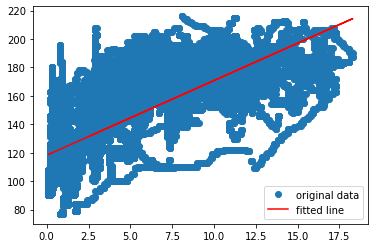

            0
0  Athlete 13
1    5.249743
2  118.281701


In [16]:
x = np.array(Ath13_Game_08_19_df['PLd_rolling_60sec'])
y = np.array(Ath13_Game_08_19_df['Heart Rate'])

res = stats.linregress(x, y)

print("Athlete 13", res)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

slopes13 = pd.DataFrame(['Athlete 13', res.slope, res.intercept])
print(slopes13)

Athlete 15 LinregressResult(slope=4.339826811302842, intercept=111.88094649001765, rvalue=0.7975869253896791, pvalue=0.0, stderr=0.011333609057671822)


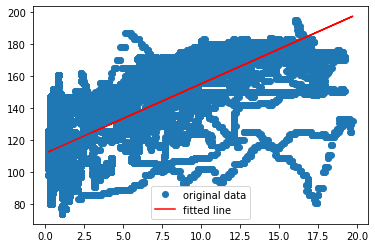

            0
0  Athlete 15
1    4.339827
2  111.880946


In [17]:
x = np.array(Ath15_Game_08_19_df['PLd_rolling_60sec'])
y = np.array(Ath15_Game_08_19_df['Heart Rate'])

res = stats.linregress(x, y)

print("Athlete 15", res)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

slopes15 = pd.DataFrame(['Athlete 15', res.slope, res.intercept])
print(slopes15)

Athlete 19 LinregressResult(slope=5.393069012776208, intercept=109.1838778306753, rvalue=0.8900501891613213, pvalue=0.0, stderr=0.00946486924328548)


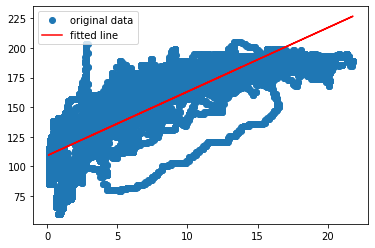

In [18]:
x = np.array(Ath19_Game_08_19_df['PLd_rolling_60sec'])
y = np.array(Ath19_Game_08_19_df['Heart Rate'])

res = stats.linregress(x, y)

print("Athlete 19", res)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

slopes19 = pd.DataFrame(['Athlete 19', res.slope, res.intercept])

Athlete 24 LinregressResult(slope=7.270472112824472, intercept=100.55583141635435, rvalue=0.8378412589221029, pvalue=0.0, stderr=0.01639643523540916)


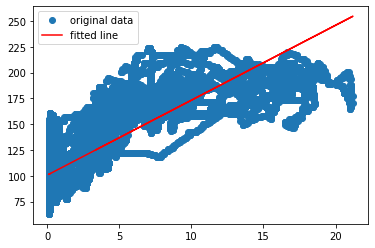

In [19]:
x = np.array(Ath24_Game_08_19_df['PLd_rolling_60sec'])
y = np.array(Ath24_Game_08_19_df['Heart Rate'])

res = stats.linregress(x, y)

print("Athlete 24", res)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

slopes24 = pd.DataFrame(['Athlete 24', res.slope, res.intercept])

Athlete 3 LinregressResult(slope=5.538835458995803, intercept=118.24575906293143, rvalue=0.8394980636463755, pvalue=0.0, stderr=0.012503345920178299)


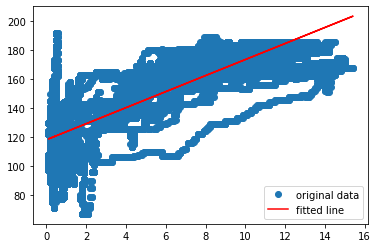

In [20]:
x = np.array(Ath3_Game_08_19_df['PLd_rolling_60sec'])
y = np.array(Ath3_Game_08_19_df['Heart Rate'])

res = stats.linregress(x, y)

print("Athlete 3", res)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

slopes3 = pd.DataFrame(['Athlete 3', res.slope, res.intercept])

Athlete 6 LinregressResult(slope=3.816962865593927, intercept=143.31164016608946, rvalue=0.8393416741917139, pvalue=0.0, stderr=0.008534760613985816)


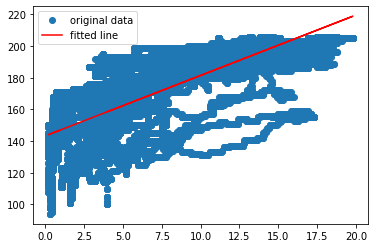

In [21]:
x = np.array(Ath6_Game_08_19_df['PLd_rolling_60sec'])
y = np.array(Ath6_Game_08_19_df['Heart Rate'])

res = stats.linregress(x, y)

print("Athlete 6", res)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

slopes6 = pd.DataFrame(['Athlete 6', res.slope, res.intercept])

In [22]:
slope_df=pd.concat([slopes13, slopes15, slopes19, slopes24, slopes3, slopes6], axis=1)
slope_df 

,0,0,0,0,0,0
0,Athlete 13,Athlete 15,Athlete 19,Athlete 24,Athlete 3,Athlete 6
1,5.249743,4.339827,5.393069,7.270472,5.538835,3.816963
2,118.281701,111.880946,109.183878,100.555831,118.245759,143.31164


In [23]:
slope_df=slope_df.T
print(slope_df.columns)

RangeIndex(start=0, stop=3, step=1)


In [24]:
slope_df.reset_index()

,index,0,1,2
0,0,Athlete 13,5.249743,118.281701
1,0,Athlete 15,4.339827,111.880946
2,0,Athlete 19,5.393069,109.183878
3,0,Athlete 24,7.270472,100.555831
4,0,Athlete 3,5.538835,118.245759
5,0,Athlete 6,3.816963,143.31164


In [25]:
slope_df.columns= ['Athlete #', 'Slope', 'Intercept']
slope_df

,Athlete #,Slope,Intercept
0,Athlete 13,5.249743,118.281701
0,Athlete 15,4.339827,111.880946
0,Athlete 19,5.393069,109.183878
0,Athlete 24,7.270472,100.555831
0,Athlete 3,5.538835,118.245759
0,Athlete 6,3.816963,143.31164


In [26]:
slope_df['BPM150']=(150-slope_df['Intercept'])/slope_df['Slope']
slope_df

,Athlete #,Slope,Intercept,BPM150
0,Athlete 13,5.249743,118.281701,6.041877
0,Athlete 15,4.339827,111.880946,8.783543
0,Athlete 19,5.393069,109.183878,7.568255
0,Athlete 24,7.270472,100.555831,6.800682
0,Athlete 3,5.538835,118.245759,5.733018
0,Athlete 6,3.816963,143.31164,1.752273


In [27]:
slope_df['BPM180']=(180-slope_df['Intercept'])/slope_df['Slope']
slope_df

,Athlete #,Slope,Intercept,BPM150,BPM180
0,Athlete 13,5.249743,118.281701,6.041877,11.756442
0,Athlete 15,4.339827,111.880946,8.783543,15.696261
0,Athlete 19,5.393069,109.183878,7.568255,13.13095
0,Athlete 24,7.270472,100.555831,6.800682,10.926961
0,Athlete 3,5.538835,118.245759,5.733018,11.149319
0,Athlete 6,3.816963,143.31164,1.752273,9.611925
